In [60]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
df = pd.read_csv("car data.csv")

In [5]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [10]:
for i in ['Seller_Type','Transmission','Fuel_Type','Owner','Year']:
    print(df[i].unique())

['Dealer' 'Individual']
['Manual' 'Automatic']
['Petrol' 'Diesel' 'CNG']
[0 1 3]
[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [12]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [13]:
type(df['Fuel_Type'])

pandas.core.series.Series

In [15]:
age = []
for i in df['Year']:
    i = 2021 - i
    age.append(i)

In [17]:
df['no_year'] = age

In [18]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,no_year
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [39]:
final_dataset=df[['Selling_Price','Present_Price','Kms_Driven','Fuel_Type','Seller_Type','Transmission','Owner']]

In [40]:
final_dataset = pd.get_dummies(final_dataset,drop_first = True)

In [41]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1


In [42]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,-0.053469,0.055687,0.124269,-0.050316
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.098643,0.091013,0.063240,1.000000


<AxesSubplot:>

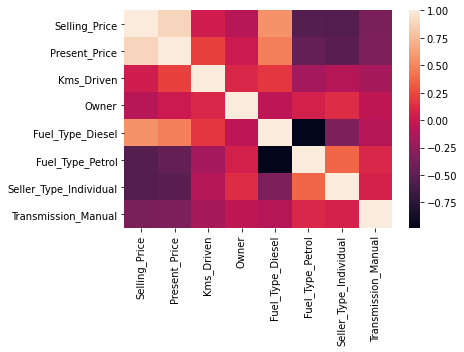

In [25]:
sns.heatmap(final_dataset.corr())

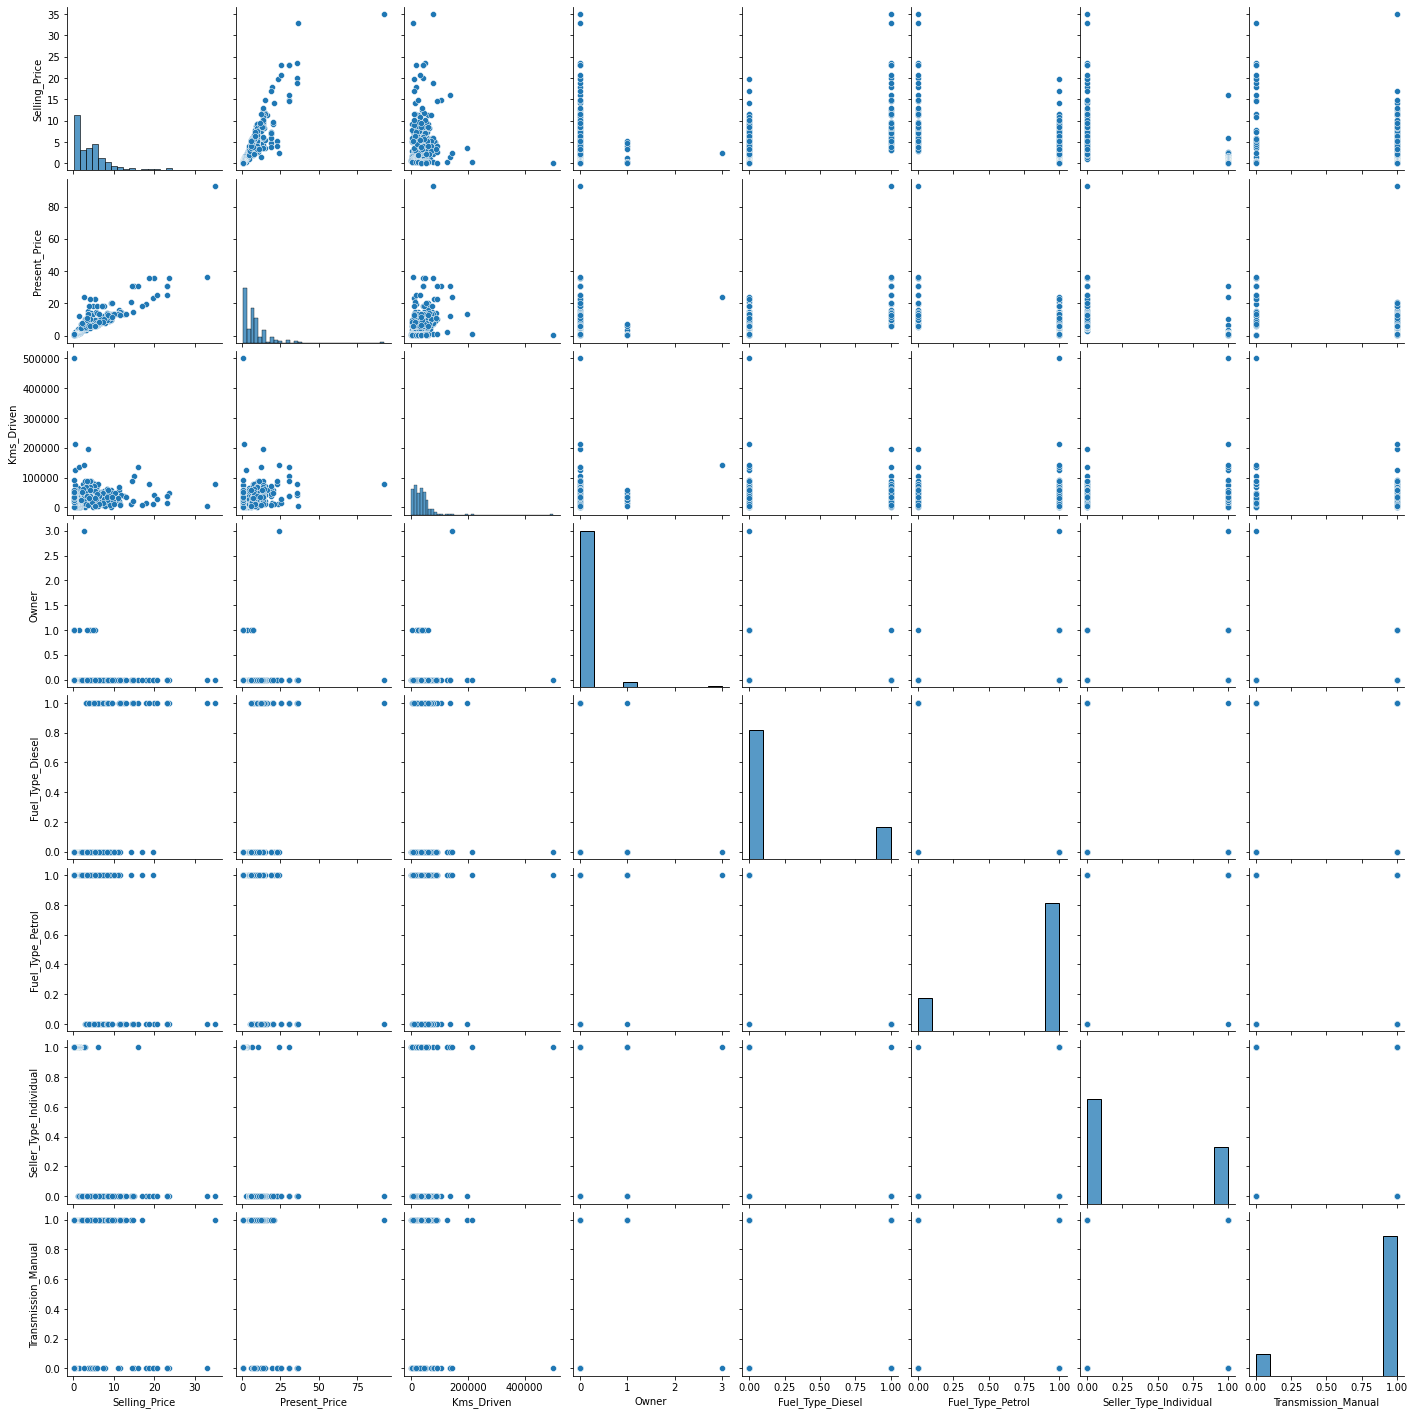

In [26]:
sns.pairplot(final_dataset)

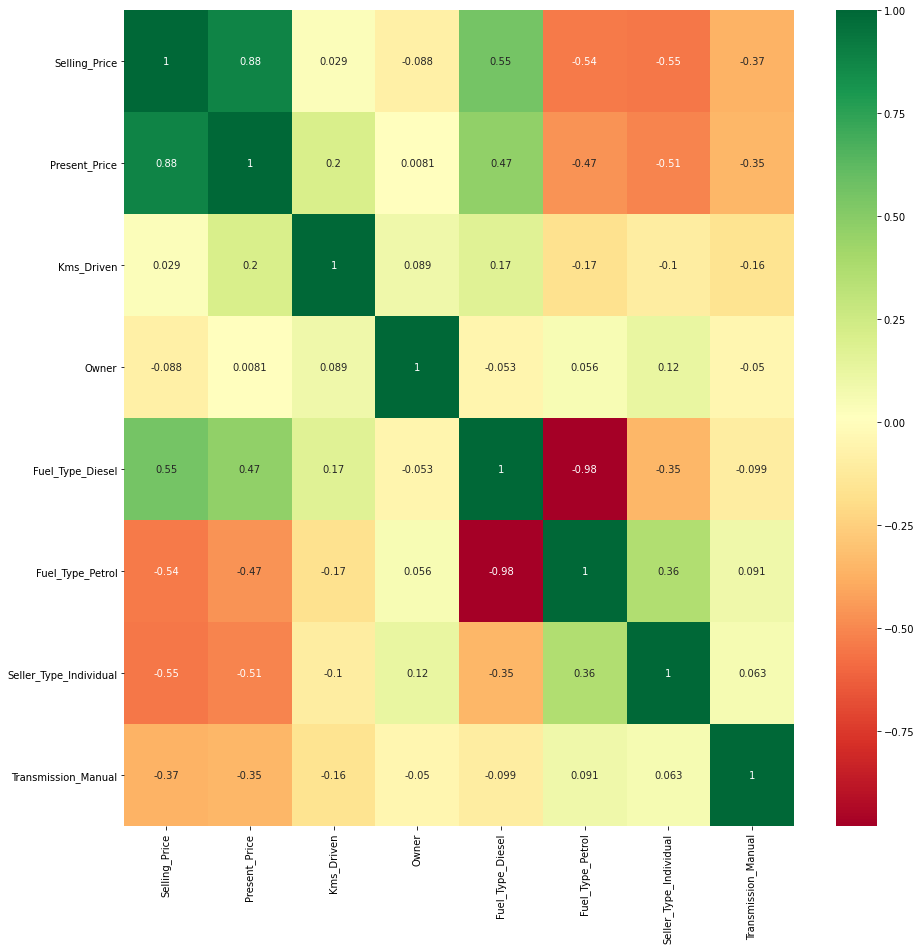

In [35]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(15,15))
#plot heat map
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [43]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,0,1,0,1
1,4.75,9.54,43000,0,1,0,0,1
2,7.25,9.85,6900,0,0,1,0,1
3,2.85,4.15,5200,0,0,1,0,1
4,4.60,6.87,42450,0,1,0,0,1


In [36]:
X = final_dataset.iloc[:,1:] #Independent features
y = final_dataset.iloc[:,0] #selling price dependent feature

In [48]:
X.head()

,Present_Price,Kms_Driven,Owner,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,0,1,0,1
1,9.54,43000,0,1,0,0,1
2,9.85,6900,0,0,1,0,1
3,4.15,5200,0,0,1,0,1
4,6.87,42450,0,1,0,0,1


Finding Important features

In [46]:
from sklearn.ensemble import ExtraTreesRegressor
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

In [47]:
print(model.feature_importances_)

[0.40439542 0.1040936  0.00075883 0.21299339 0.01194887 0.12508898
 0.1407209 ]


Hence we can see that Present_Price and Fuel_Type_Diesel are 2 most important features

<AxesSubplot:>

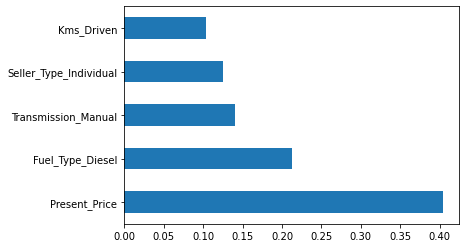

In [56]:
features = pd.Series(model.feature_importances_,index = X.columns)
features.nlargest(5).plot(kind='barh')

In [57]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state=0)

In [58]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor()

In [65]:
from sklearn.model_selection import RandomizedSearchCV

In [61]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
# max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 100]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 5, 10]

In [62]:
# Createating the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [63]:
rf = RandomForestRegressor()

In [66]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,scoring='neg_mean_squared_error', n_iter = 10, cv = 5, verbose=2, random_state=42, n_jobs = 1)

In [67]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.1s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.2s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.5s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   3.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimators=1100; total time=   2.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=10, n_estimator

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [68]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [69]:
rf_random.best_score_

-4.548418472261213

In [70]:
predictions=rf_random.predict(X_test)

In [75]:
predictions

array([ 5.22979   ,  0.53037   ,  4.81205   ,  8.87929   , 15.78634   ,
        4.55535   ,  3.6235    ,  0.66321   ,  5.30775   ,  5.16422702,
        3.52427   ,  0.86505   ,  4.6406    ,  8.18921   ,  7.2717    ,
       10.04902   ,  7.74064   ,  3.847     ,  0.53379   ,  1.52195   ,
        4.99533333,  4.3729    ,  6.8548775 ,  9.31129   ,  0.25518   ,
        0.59579   ,  0.39374   ,  0.68172   ,  0.55839   ,  6.24535   ,
        4.1444    ,  6.02065   ,  0.50804   ,  8.60935   ,  4.2438625 ,
        1.16562   ,  5.7353    ,  6.15741   ,  0.25392   ,  9.88813   ,
        8.79096   , 21.1006    ,  4.6855    ,  3.81546667,  5.46545   ,
       11.57667833,  0.37532   ,  0.78471   ,  4.6575525 ,  7.95661   ,
        8.80381   ,  3.37011   ,  4.50880833, 20.5743    ,  1.12854   ,
        1.08845   ,  0.56727   ,  2.83455   ,  3.29924   ,  1.06515   ,
        5.10699   ,  8.91322   ,  3.32568   , 21.14939   ,  3.87116   ,
        4.9241475 ,  8.7523    ,  6.3335    ,  0.44591   ,  3.68

c:\users\n.s\anaconda3\envs\carprediction\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

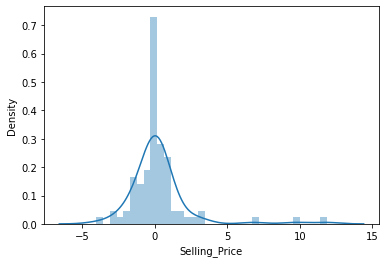

In [71]:
sns.distplot(y_test-predictions)

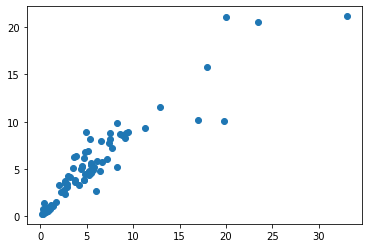

In [72]:
plt.scatter(y_test,predictions)

Since the y_test and predictions are almost in the same line therefore we can conclude that our predictions are good

In [73]:
from sklearn import metrics

In [74]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, predictions))
print('Mean Squered Error:', metrics.mean_squared_error(y_test, predictions))
print('Root Mean squared Error:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

Mean Absolute Error: 1.071541212715854
Mean Squered Error: 4.397536456941418
Root Mean squared Error: 2.097030390085327


In [76]:
import pickle
file = open('random_forest_regression_model.pkl', 'wb')
pickle.dump(rf_random, file)